# Simulacion PID Autonomo Rover

Simulacion para el menejo del error con respecto del tiempo y de la distancia, analizado mediante una camara Intel Realsense
Depth Camera, haciendo uso de multiples librerias y metodos de IA

Primero comenzamos instalando las librerias en nuestro entorno virtual



In [1]:
import pyrealsense2 as rs
import cv2 
import numpy as np
from math import e
import matplotlib.pyplot as plt


Posteriormente procedemos a realizar la definicion de nuestras clases que nos permitiran trabajar con una mayor agilidad con la camara realsense

In [2]:
class RoverCamera:
    def __init__(self) -> None:
        pass
    # Configure depth and color streams
        self.pipeline = rs.pipeline()
        config = rs.config()

        # Get device product line for setting a supporting resolution
        pipeline_wrapper = rs.pipeline_wrapper(self.pipeline)
        pipeline_profile = config.resolve(pipeline_wrapper)
        device = pipeline_profile.get_device()
        device_product_line = str(device.get_info(rs.camera_info.product_line))

        config.enable_stream(rs.stream.depth, 640, 480, rs.format.z16, 30)
        config.enable_stream(rs.stream.color, 640, 480, rs.format.bgr8, 30)



        # Start streaming
        self.pipeline.start(config)

    def get_frames(self):
        frames = self.pipeline.wait_for_frames()

        depth_frame = frames.get_depth_frame()
        color_frame = frames.get_color_frame()

        depth_time = depth_frame.get_timestamp()

        # # Apply filter to fill the Holes in the depth image
        # spatial = rs.spatial_filter()
        # spatial.set_option(rs.option.holes_fill, 3)
        # filtered_depth = spatial.process(depth_frame)

        # hole_filling = rs.hole_filling_filter()
        # filled_depth = hole_filling.process(filtered_depth)

        # Create colormap to show the depth of the Objects
        colorizer = rs.colorizer()
        depth_colormap = np.asanyarray(colorizer.colorize(depth_frame).get_data())


        depth_image = np.asanyarray(depth_frame.get_data())
        color_image = np.asanyarray(color_frame.get_data())
        if not depth_frame or not color_frame:
            return False, None, None
        return True, depth_frame, depth_image, color_image, depth_colormap

    def release(self):
        self.pipeline.stop()

Esta clase nos permite inicializar nuestra camara, ademas de que al utilizar el pyrealsense2 podemos obtener de manera fiel los datos que la camara nos provee

In [3]:
point = (320,240)
distances = []

In [4]:
class Jetson_Rover:
    camera_Rover = RoverCamera()
    velocidad = 0
    
    def __init__(self):
        pass
    
    def calc_Velocity(self, distances, time_elapsed):
        pass
    def draw_Point(self, bgr_frame, depth_frame, distance):
        cv2.circle(bgr_frame,(point[0], point[1]),2,(0,255,0),2)
        cv2.putText(bgr_frame,"{:.3f}m".format(distance), (point[0], point[1]-10),1,2,(0,255,0),2)
        
        cv2.circle(depth_frame,(point[0], point[1]),2,(0,255,0),2)
        cv2.putText(depth_frame,"{:.3f}m".format(distance), (point[0], point[1]-10),1,2,(0,255,0),2)
        
    def init_Rover(self):
        print("Iniciando Rover...")
        
        while(True):
            state, depth_frame, depth_image, color_image, depth_colorMap = self.camera_Rover.get_frames()
            
            if not state:
                print("An error have ocurred, verify the camera conection")
                break
            
            distance = depth_frame.get_distance(point[0], point[1])
            
            distances.append(distance)
                        
            self.draw_Point(color_image, depth_colorMap, distance)
            
            cv2.imshow("Color frame", color_image)
            cv2.imshow("ColorMap", depth_colorMap)
            
            key = cv2.waitKey(1)
            
            if key == 27:
                cv2.destroyAllWindows()
                break


rover = Jetson_Rover()
rover.init_Rover()
print(distances)

Iniciando Rover...


qt.qpa.plugin: Could not find the Qt platform plugin "wayland" in "/home/fernu/Escritorio/IPN_IA/JetsonNano_IA/Jetson_Venv/lib/python3.10/site-packages/cv2/qt/plugins"


[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1550000011920929, 0.0, 0.1550000011920929, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.16600000858306885, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15700000524520874, 0.164000004529953, 0.17100000381469727, 0.17900000512599945, 0.1850000023841858, 0.1900000125169754, 0.19200000166893005, 0.1940000057220459, 

### Calculating the Error ECD

Now after we get a data bank by a testing with the camera we need to load and analyze the data for improve the code and work better

In [5]:
def posicion(k, h, u):
    return k + h*(-u)

In [6]:
def voltaje(e):
    return 100*e

In [7]:
def Direccion(e):
    if(e<0):
        return 1
    elif(e>=0):
        return 0

In [8]:
def PulseModule(e):
    return 

## Calculo del Error respecto al tiempo

Utilizando los parametros antes mencionados y sabiendo que e = r - x; con x siendo una función de t, tenemos entonces que 
e(t) = r - x(t), en base a la ecuacion dicha del error podemos calcular respecto al tiempo en segundos del orden de 10**-3 ya que el tiempo entre casa frame son unos cuantos milisegundos despreciables para efectos de esta simulacion.

Utilizando unicamente parametros de tiempo se puede apreciar que el valor absoluto del error decrece de manera exponencial inversa conforme lo hace el tiempo

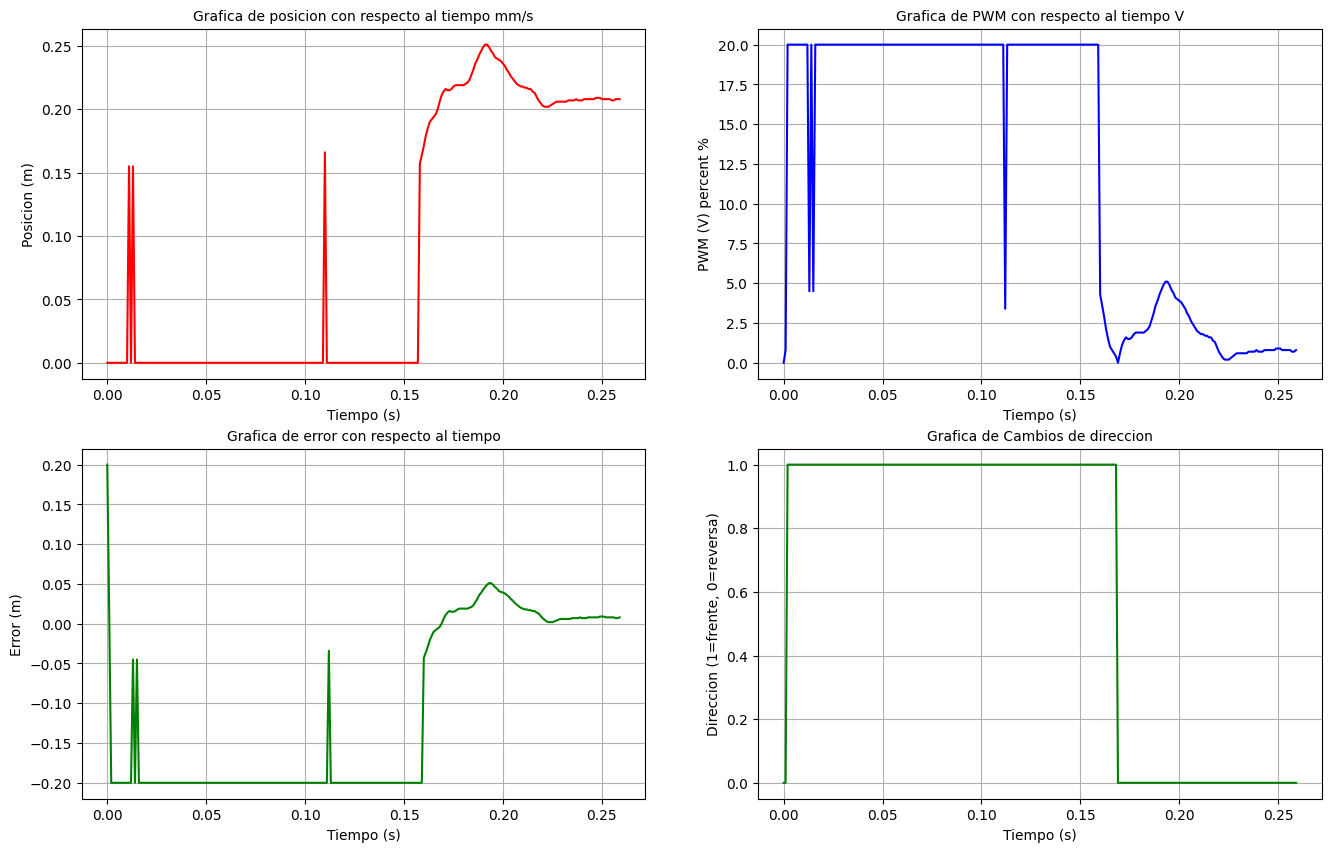

In [9]:
# Creamos un array de distancias simuladas en m
u = []
e = []
d = []
u.append(0)
e.append(0.2-distances[0])
d.append(0)

Umax = 12

Pwm = 0

for i in range(0, len(distances)-1):
    
    E = distances[i-1]-0.2
    
    d.append(Direccion(E))
    e.append(E)
    V = voltaje(E)
    
    #Establecemos un rango de trabajo con el voltaje maximo de trabajo de nuestros motores
    if abs(V)>=100:
        pwm = 100
        u.append(pwm)
    elif abs(V) < 100:
        u.append(abs(V))        

# print(x)
t = np.array([i*10**(-3) for i in range(0, len(distances)) ])

plt.figure(figsize=(16,10))

plt.subplot(2, 2, 1)
plt.grid(True)
plt.title("Grafica de posicion con respecto al tiempo mm/s", fontsize=10)
plt.xlabel("Tiempo (s)")
plt.ylabel("Posicion (m)")
plt.plot(t, distances, 'r')

plt.subplot(2,2, 2)
plt.grid(True)
plt.title("Grafica de PWM con respecto al tiempo V", fontsize=10)
plt.xlabel("Tiempo (s)")
plt.ylabel("PWM (V) percent %")
plt.plot(t, u, 'b')

plt.subplot(2,2,3)
plt.grid(True)
plt.title("Grafica de error con respecto al tiempo", fontsize=10)
plt.xlabel("Tiempo (s)")
plt.ylabel("Error (m)")
plt.plot(t, e, 'g')

plt.subplot(2,2,4)
plt.grid(True)
plt.title("Grafica de Cambios de direccion", fontsize=10)
plt.xlabel("Tiempo (s)")
plt.ylabel("Direccion (1=frente, 0=reversa)")
plt.plot(t, d, 'g')
#plt.plot(exp, 'r')
